In [15]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
data = pd.read_csv('Titanic.csv')

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.shape

(418, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
# Handling missing values and duplicates
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          87 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        87 non-null     object 
 11  Embarked     87 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.8+ KB


<ipython-input-16-bc888adf69ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


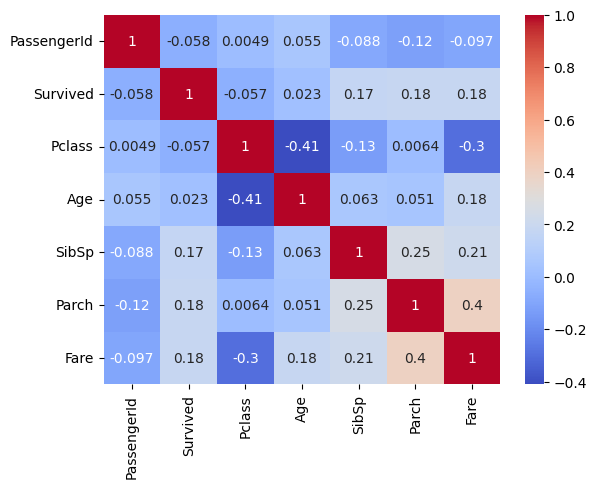

In [16]:
# Exploratory data analysis
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

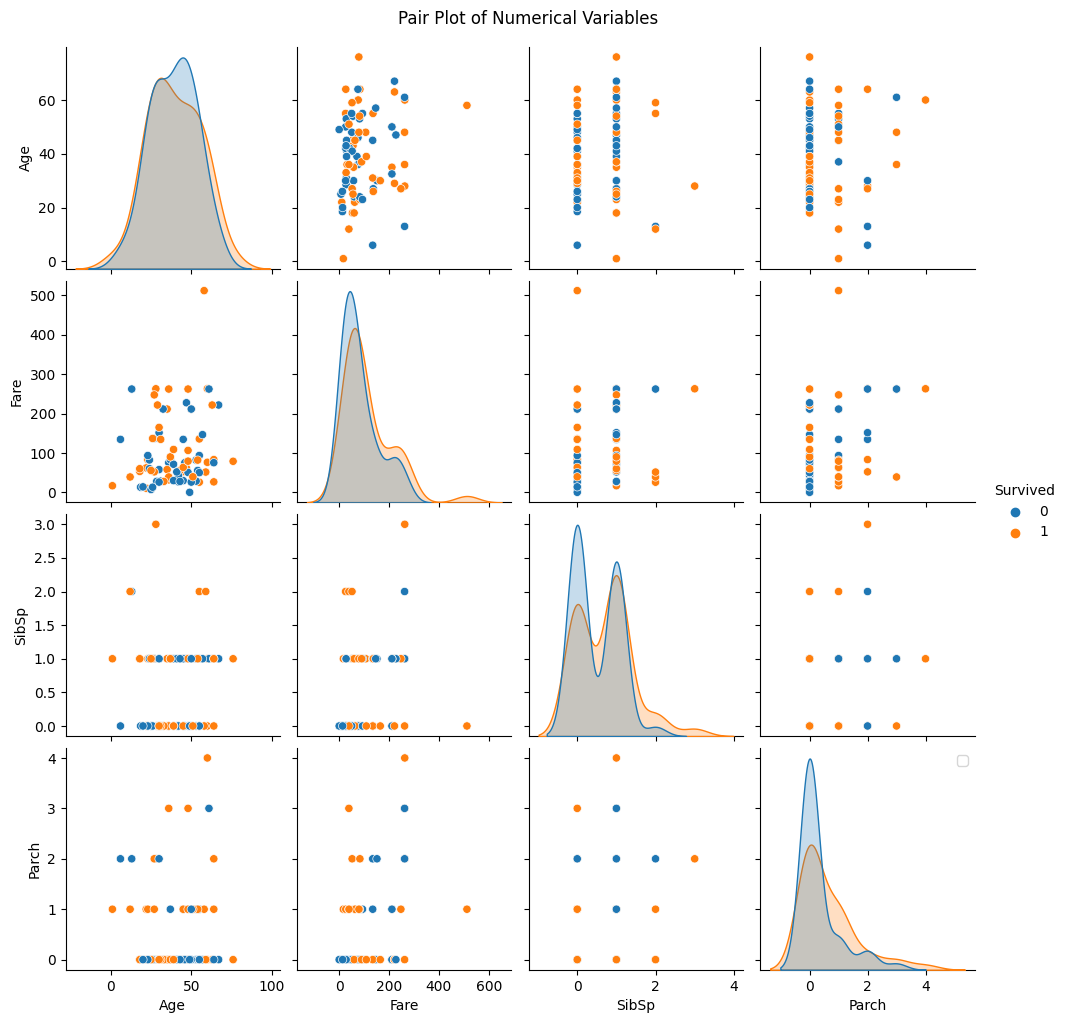

In [20]:
# Pair plot of selected numerical variables
sns.pairplot(data = data, vars=['Age','Fare','SibSp','Parch'], hue='Survived')
plt.suptitle('Pair Plot of Numerical Variables', y= 1.02)
plt.legend()
plt.show()

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [44]:
data['Pclass'].unique()

array([1, 3, 2])

In [22]:
# Preprocessing
features = ['Pclass','Age','SibSp','Parch','Fare']
x = data[features]
y = data['Survived']  # Target values

In [23]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [24]:
# Standardize features
scaler = StandardScaler()

#Fit and transform the training data using the scaler
x_train = scaler.fit_transform(x_train)
# The scaler learns the mean and standard deviation from the training data and transform the features to have mean of 0 and std of 1

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)
# We only transform the test data using the learned mean and std from the training data
# This ensures that the test data is scaled in the same way as the training data.


In [26]:
# Model training
model = LogisticRegression()
model.fit(x_train, y_train) # Train the model

LogisticRegression()

In [28]:
# Evaluation
y_pred = model.predict(x_test) # Use the trained model to predict on the scaled test data

# Calculate the accuracy of the model prediction
accuracy = accuracy_score(y_test, y_pred)
# Accuracy is the ratio of correct prediciton to total predictio made by the model

# Create a confusion matrix to understand model prediction
cm = confusion_matrix(y_test, y_pred)
# Confusion matrix is a table that shows teh count of true positive and negative predictions and false positive and negative predictios

# Generate classification report
classification= classification_report(y_test, y_pred)

# Display results
print('Evaluation Results:')
print('_'*40)
print('Accuracy:',accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification)

Evaluation Results:
________________________________________
Accuracy: 0.5555555555555556

Confusion Matrix:
 [[7 1]
 [7 3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.75      0.30      0.43        10

    accuracy                           0.56        18
   macro avg       0.62      0.59      0.53        18
weighted avg       0.64      0.56      0.52        18



An Accuracy of 0.556 (Rounded) means that the model correctly predicted the survival approximately 55.6% of the passengers in the dataset. In other words, out of all the predictions made by the model on the test data, about 55.6% were accurate.

In [35]:
# Interpretation of coefficients
# Coefficient helps us understand the influence of each feature on the prediction
coef = model.coef_.ravel() # Get the coefficient learned by the model
intercept = model.intercept_ # Get the intercept model
feature_name = x.columns

# Create dataframe to display the coefficent of each feature
coef_df = pd.DataFrame({"Feature": feature_name, "Coefficient": coef})

print('Interpelation of Coefficients')
print("_"*40)
print(coef_df)

Interpelation of Coefficients
________________________________________
  Feature  Coefficient
0  Pclass    -0.069386
1     Age    -0.050834
2   SibSp     0.074715
3   Parch     0.329330
4    Fare    -0.016281


In [50]:
# Prediction for new input
input = pd.DataFrame({
    'Pclass': [1],
    'Age': [43],
    'SibSp': [0],
    'Parch': [1],
    'Fare': [35]
})

# Standardise new input
input_scale = scaler.transform(input)

# Make prediction for new input
prediction = model.predict(input_scale)
print('\nPrediction For Input:' ,prediction[0])


Prediction For Input: 1


In [51]:
#Interpretation
if prediction[0] == 1:
  print("The model predicts that the passenger in the new input would have survived")
else:
  print("The model predicts that the passenger in the new input would have not survived")

The model predicts that the passenger in the new input would have survived
